Abgabe von: Mat.Nr.: 9452857 & 1113800

Before doing anything installing all needed dependencies

# Software requirements

Python 3.9–3.11

Version	Python version	Compiler	Build tools	cuDNN	CUDA
tensorflow-2.16.1	3.9-3.12	Clang 17.0.6	Bazel 6.5.0	8.9	12.3

!pip3 install pandas
!pip3 install scikit-learn
!pip3 install tensorflow
!pip3 install keras-tuner
!pip3 install scikeras
!pip3 install matplotlib

# Aufgabe 1

In [111]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Import data

In [112]:
white_raw = pd.read_csv(os.getcwd() + "/dataset/winequality-white.csv", delimiter=";")
red_raw = pd.read_csv(os.getcwd() + "/dataset/winequality-red.csv", delimiter=";")

In [113]:
white_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Split wine in Test and Training Data (75% / 25%)

In [114]:
white_training_Data, white_test_data, white_training_scores, white_test_scores = (train_test_split(white_raw.drop("quality", axis=1), white_raw['quality'],test_size=0.25, random_state=39))

red_training_Data, red_test_data, red_training_scores, red_test_scores = (train_test_split(red_raw.drop("quality", axis=1), red_raw['quality'],test_size=0.25, random_state=39))

Normalize the Data
Normalizer better suited for Regression problems than Standard Scaler

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, normalize, MinMaxScaler, StandardScaler

pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('scaler2', MinMaxScaler())
])

white_training_Data_scaled = np.array(pipeline.fit_transform(white_training_Data))
white_training_scores = np.array(white_training_scores)
white_test_data_scaled = np.array(pipeline.transform(white_test_data))
white_test_scores = np.array(white_test_scores)

red_training_Data_scaled = np.array(pipeline.fit_transform(red_training_Data))
red_training_scores = np.array(red_training_scores)
red_test_data_scaled = np.array(pipeline.transform (red_test_data))
red_test_scores = np.array(red_test_scores)


In [116]:
#white_training_Data = np.array(white_training_Data_scaled)
#red_training_Data = np.array(red_training_Data_scaled)

In [117]:
white_training_Data_scaled

array([[0.33653846, 0.29411765, 0.13855422, ..., 0.35185185, 0.39285714,
        0.51612903],
       [0.24038462, 0.24509804, 0.12048193, ..., 0.38888889, 0.3452381 ,
        0.12903226],
       [0.34615385, 0.32352941, 0.39759036, ..., 0.30555556, 0.28571429,
        0.11290323],
       ...,
       [0.34615385, 0.11764706, 0.22289157, ..., 0.28703704, 0.23809524,
        0.19354839],
       [0.33653846, 0.04901961, 0.19277108, ..., 0.44444444, 0.1547619 ,
        0.19354839],
       [0.28846154, 0.10784314, 0.20481928, ..., 0.49074074, 0.27380952,
        0.79032258]])

# Aufgabe 3

https://www.tensorflow.org/tutorials/keras/regression#regression_using_a_dnn_and_multiple_inputs

In [118]:
import keras
from keras import layers
import tensorflow as tf
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

from scikeras.wrappers import KerasRegressor

In [119]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [120]:
def plot_loss(keras_regressor_model):
  plt.plot(keras_regressor_model.history['loss'], label='loss')
  plt.plot(keras_regressor_model.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Wine Quality Score]')
  plt.legend()
  plt.grid(True)
  plt.show()
  
def plot_metrics(white_test_scores, test_predictions):
    a = plt.axes(aspect='equal')
    plt.scatter(white_test_scores, test_predictions)
    plt.xlabel('True Values [winequality-white]')
    plt.ylabel('Predictions [winequality-white]')
    lims = [0, 10]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

In [121]:
# Function to calculate model and print Bewertungsmetriken
def model_regressor_grid_calculator(estimator: any, param_grid: dict | list,
                               training_data: any, valid_data: any, training_scores: any, valid_scores: any):
    #select the best HyperParameters while using cross-validation for it (cv=5)
    grid_search = GridSearchCV(estimator, param_grid=param_grid, cv=5, scoring="r2")
    grid_search.fit(training_data, training_scores)
    
    print("Beste Hyperparameter: " + str(grid_search.best_params_))
    
    # Select the best model from Grid Search
    optimal_model = grid_search.best_estimator_
    
    # Selected Params
    cv_results = pd.DataFrame(grid_search.cv_results_).loc[grid_search.best_index_]
    
    r2_score_cv = [cv_results['split0_test_score'], 
                   cv_results['split1_test_score'],
                   cv_results['split2_test_score'],
                   cv_results['split3_test_score'],
                   cv_results['split4_test_score'],
                   ]
    r2_score_cv_mean = cv_results['mean_test_score']
    r2_score_cv_std = cv_results['std_test_score']
    
    print('Cross Validation')
    print(f'- R^2: {r2_score_cv}')
    print(f'- R^2 Durchschnittlicher: {r2_score_cv_mean:.4f}')
    print(f'- R^2 Standardabweichung: {r2_score_cv_std:.4f}')
    print('\r\n')
    
    
    predicted_test_scores = optimal_model.predict(valid_data)
    
    r2_score_test = r2_score(valid_scores, predicted_test_scores)
    rmse_test = sqrt(mean_squared_error(valid_scores, predicted_test_scores))
    mape_test = mean_absolute_percentage_error(valid_scores, predicted_test_scores)
    
    print('Test:')
    print(f'- R^2: {r2_score_test:.4f}')
    print(f'- RMSE: {rmse_test:.2f}')
    print(f'- MAPE: {mape_test:.2%}')
    
    plot_loss(optimal_model)
    plot_metrics(valid_scores, predicted_test_scores)
    
    return cv_results, optimal_model

In [122]:
#input_layer = layers.Input(shape=(11,))
normalizer = layers.Normalization(axis=-1)
#normalizer.adapt(white_training_Data)

In [130]:
def create_model(unit, n_layers):    
    # Konfiguriere die Verteilungsstrategie
    input_layer = layers.Input(shape=(11,))
    model = keras.Sequential([
        input_layer,        
    ])
    for i in range(n_layers):
        local_units = -1*i*(unit/(n_layers+1))+unit
        model.add(layers.Dense(units=int(local_units), activation='relu'))
    model.add(layers.Dense(1))
         
    model.compile(loss=keras.losses.mean_squared_error,
            optimizer=keras.optimizers.Adam(0.001), metrics=[keras.metrics.mean_absolute_percentage_error, keras.metrics.R2Score])      
    
    return model

In [160]:
from keras.src.models.cloning import clone_model
from sklearn.model_selection import KFold


def evaluate_model_cv(training_data, training_scores, valid_data, valid_scores):
    cv_scores = []
    models = []
    
    kfold = KFold(n_splits=5, shuffle=True) #Cross Validation cv=5
    for i, (train_index, test_index) in enumerate(kfold.split(training_data, training_scores)):
        local_model = create_model(18, 2)
        model_history = local_model.fit(training_data[train_index], training_scores[train_index], batch_size=64, epochs=128, validation_data=(training_data[test_index], training_scores[test_index]), verbose=0)
        cv_scores.append(local_model.evaluate(training_data[test_index], training_scores[test_index]))
        models.append((local_model, model_history))
    
    cv_scores = np.array(cv_scores)
    print('\r\nCross Validation')
    print(f'- R^2: {cv_scores[:, 2]}')
    print(f'- R^2 Durchschnittlicher: {np.mean(cv_scores[:, 2]):.4f}')
    print(f'- R^2 Standardabweichung: {np.std(cv_scores[:, 2]):.4f}')
    print('\r\n')
    
    #get best model
    best_model_index = np.argmax(cv_scores[:, 2])
    optimal_model = models[best_model_index]
    
    predicted_test_scores = optimal_model[0].predict(valid_data)
    
    r2_score_test = r2_score(valid_scores, predicted_test_scores)
    rmse_test = sqrt(mean_squared_error(valid_scores, predicted_test_scores))
    mape_test = mean_absolute_percentage_error(valid_scores, predicted_test_scores)
    
    print('Test:')
    print(f'- R^2: {r2_score_test:.4f}')
    print(f'- RMSE: {rmse_test:.2f}')
    print(f'- MAPE: {mape_test:.2%}')
    
    plot_loss(optimal_model[1])
    plot_metrics(valid_scores, predicted_test_scores)
    
    return cv_scores, optimal_model
        

In [161]:
%%time
cv_scores, best_model = evaluate_model_cv(white_training_Data_scaled, white_training_scores, white_test_data_scaled, white_test_scores)

ValueError: You must call `compile()` before using the model.

Ablauf Hyperparameter optimierung:
Fitting 5 folds for each of x candidates totalling 5x fits
Select best model based on r2 score mean (valid)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test:
- R^2: 0.2857
- RMSE: 0.75
- MAPE: 10.68%


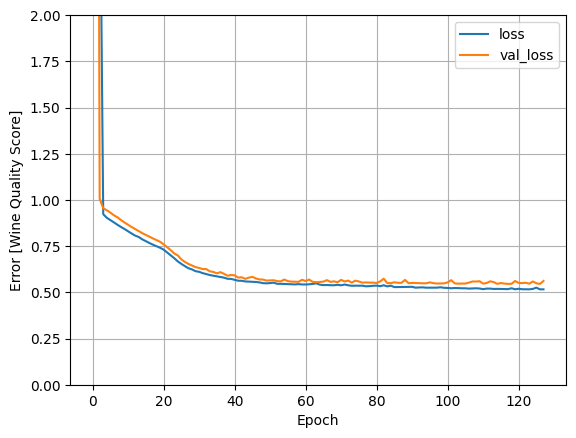

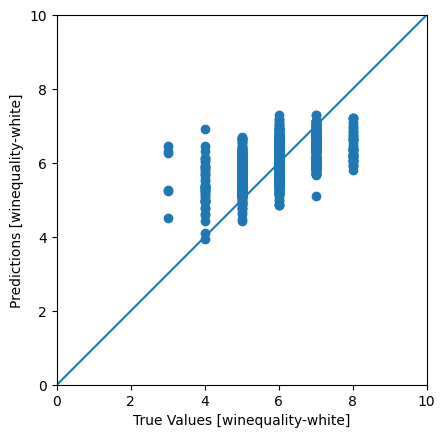

CPU times: user 12.7 s, sys: 3.32 s, total: 16 s
Wall time: 13.4 s


In [81]:
%%time
white_model = create_model(18,2)
history = white_model.fit(white_training_Data_scaled, white_training_scores, batch_size=64, epochs=128, validation_data=(white_test_data_scaled, white_test_scores), verbose=0)

predicted_test_scores = white_model.predict(white_test_data_scaled)
    
r2_score_test = r2_score(white_test_scores, predicted_test_scores)
rmse_test = sqrt(mean_squared_error(white_test_scores, predicted_test_scores))
mape_test = mean_absolute_percentage_error(white_test_scores, predicted_test_scores)

print('Test:')
print(f'- R^2: {r2_score_test:.4f}')
print(f'- RMSE: {rmse_test:.2f}')
print(f'- MAPE: {mape_test:.2%}')

plot_loss(history)
plot_metrics(white_test_scores, predicted_test_scores)

Beste Hyperparameter: {'batch_size': 64, 'epochs': 128, 'model__n_layers': 2, 'model__unit': 18}
Cross Validation
- R^2: [0.27299534037678685, 0.27849092710213286, 0.3414229806657383, 0.3346110095092577, 0.3368909519304889]
- R^2 Durchschnittlicher: 0.3129
- R^2 Standardabweichung: 0.0305


Test:
- R^2: 0.3049
- RMSE: 0.74
- MAPE: 10.37%


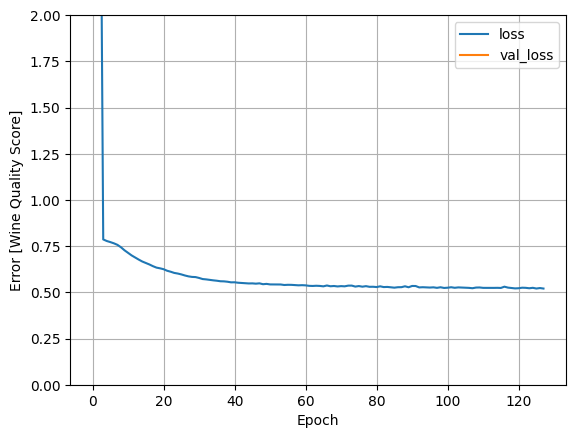

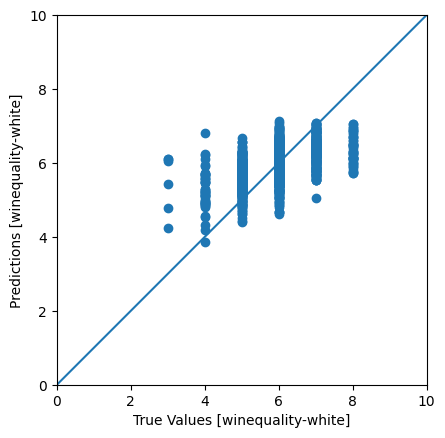

CPU times: user 47.9 s, sys: 12.2 s, total: 1min
Wall time: 51 s


In [75]:
%%time
#normalizer = layers.Normalization(axis=-1)
#normalizer.adapt(white_training_Data)
KerasRegressor_model=KerasRegressor(model=create_model, epochs=32, batch_size=32, model__unit=16, model__n_layers=1, verbose=0)

params={'batch_size':[16, 32, 64],  
        'epochs':[32, 64, 128, 256], 
        'model__unit':[8, 16, 32], 
        'model__n_layers':[1,2,3,7,8],            
} 
best_params={'batch_size':[64],  
        'epochs':[128], 
        'model__unit':[18], 
        'model__n_layers':[2]
} 

cv_results, optimal_model = model_regressor_grid_calculator(KerasRegressor_model, best_params, white_training_Data_scaled, white_test_data_scaled, white_training_scores, white_test_scores)

In [76]:
optimal_model.model_.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 18)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 12)             │           228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,373 (5.37 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 916 (3.58 KB)

### RED

Beste Hyperparameter: {'batch_size': 64, 'epochs': 256, 'model__n_layers': 2, 'model__unit': 22}
Cross Validation
- R^2: [0.26981800095590247, 0.10357437135757586, 0.031054170676154236]
- R^2 Durchschnittlicher: 0.1713
- R^2 Standardabweichung: 0.1017


Test:
- R^2: 0.3616
- RMSE: 0.70
- MAPE: 9.87%


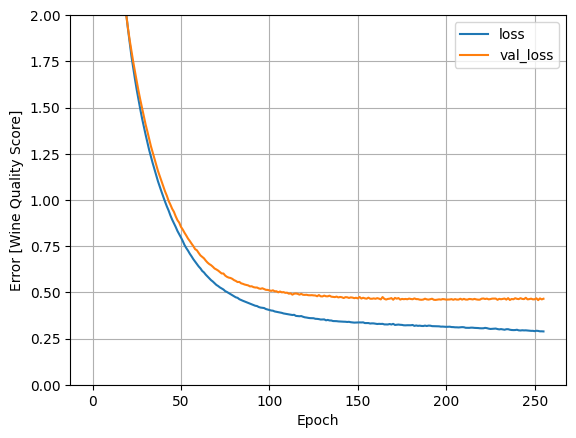

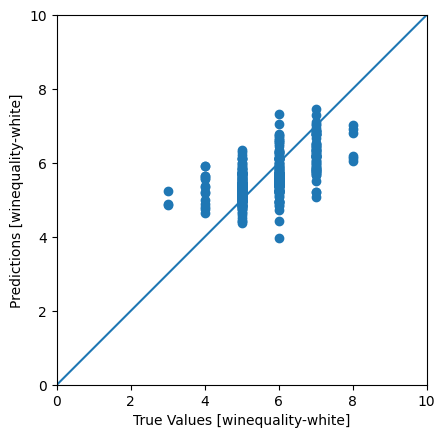

CPU times: total: 10.2 s
Wall time: 42.1 s


In [60]:
%%time
#normalizer = layers.Normalization(axis=-1)
#normalizer.adapt(red_training_Data)
KerasRegressor_model=KerasRegressor(model=create_model, epochs=32, batch_size=32, model__unit=16, model__n_layers=1, verbose=0, validation_split=0.2)

params={'batch_size':[16, 32, 64],  
        'epochs':[32, 64, 128, 256], 
        'model__unit':[8, 16, 32], 
        'model__n_layers':[1,2,3,7,8],            
} 
best_params={'batch_size':[64],  
        'epochs':[256], 
        'model__unit':[22], 
        'model__n_layers':[2]
} 

cv_results, optimal_model = model_regressor_grid_calculator(KerasRegressor_model, best_params, red_training_Data_scaled, red_test_data_scaled, red_training_scores, red_test_scores)

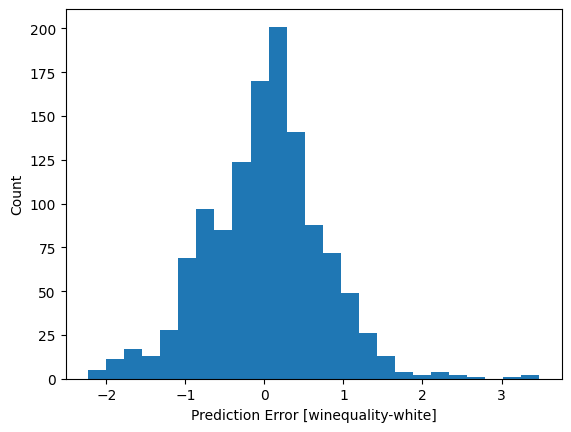

In [17]:
error = test_predictions - white_test_scores
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [winequality-white]')
_ = plt.ylabel('Count')